In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sympy.solvers import solve
from sympy import Symbol
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [5]:
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [6]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Idenficación de Datos faltas y atípicos')

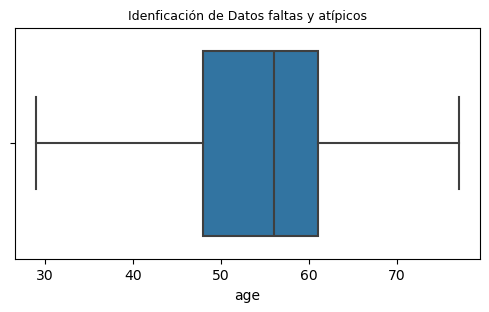

In [71]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Idenficación de Datos faltas y atípicos', fontsize=9)

In [12]:
print("Cantidad de registros con cero en edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de registros con cero en sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de registros con cero en presión arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de registros con cero en presión ritmo cardiaco: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de registros con cero en colesterol: ",Datos['chol'].isin([0]).sum())

Cantidad de registros con cero en edad:  0
Cantidad de registros con cero en presión arterial:  0
Cantidad de registros con cero en presión ritmo cardiaco:  0
Cantidad de registros con cero en colesterol:  0


In [13]:
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Text(0.5, 1.0, 'Idenficación de Datos faltas y atípicos')

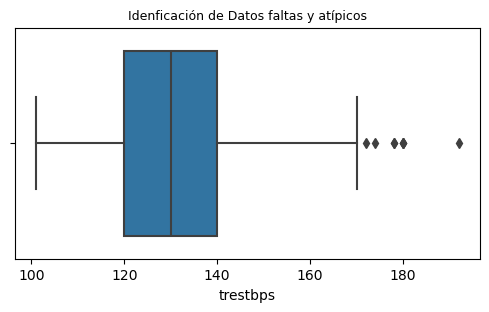

In [39]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Idenficación de Datos faltas y atípicos', fontsize=9)

In [74]:
nivel_minimo=160
nivel_maximo=200
Total_atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_atipicos))

El total de datos atípicos es 265


In [75]:
Datos = Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [76]:
Total_atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print ("El total de datos atípicos es {}".format(Total_atipicos))

El total de datos atípicos es 0


In [77]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 5 to 242
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        14 non-null     int64  
 1   sex        14 non-null     int64  
 2   cp         14 non-null     int64  
 3   trestbps   14 non-null     int64  
 4   chol       14 non-null     int64  
 5   fbs        14 non-null     int64  
 6   restecg    14 non-null     int64  
 7   thalach    14 non-null     int64  
 8   exang      14 non-null     int64  
 9   oldpeak    14 non-null     float64
 10  slope      14 non-null     int64  
 11  ca         14 non-null     int64  
 12  thal       14 non-null     int64  
 13  condition  14 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 1.6 KB


In [79]:
Datos['fbs'].value_counts()

fbs
0    8
1    6
Name: count, dtype: int64

In [81]:
Datos[['thalach']].head(40)

,thalach
5,155
9,145
10,159
45,195
76,150
117,162
167,165
178,154
206,140
209,143


In [82]:
X = Datos.drop('fbs',axis=1)
Y = Datos['fbs']

In [83]:
X.head(50)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
5,64,1,0,170,227,2,155,0,0.6,1,0,2,0
9,59,1,0,178,270,2,145,0,4.2,2,0,2,0
10,59,1,0,170,288,2,159,0,0.2,1,0,2,1
45,54,1,1,192,283,2,195,0,0.0,0,1,2,1
76,68,1,2,180,274,2,150,1,1.6,1,0,2,1
117,52,1,2,172,199,0,162,0,0.5,0,0,2,0
167,66,0,3,178,228,0,165,1,1.0,1,2,2,1
178,64,0,3,180,325,0,154,1,0.0,0,0,0,0
206,59,1,3,170,326,2,140,1,3.4,2,0,2,1
209,59,0,3,174,249,0,143,1,0.0,1,0,0,1


In [84]:
Y.head(50)

5      0
9      0
10     0
45     0
76     1
117    1
167    1
178    0
206    0
209    0
210    1
219    1
225    1
242    0
Name: fbs, dtype: int64

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [86]:
print (X_train)

     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
10    59    1   0       170   288        2      159      0      0.2      1   
242   55    0   3       180   327        1      117      1      3.4      1   
209   59    0   3       174   249        0      143      1      0.0      1   
9     59    1   0       178   270        2      145      0      4.2      2   
178   64    0   3       180   325        0      154      1      0.0      0   
210   59    1   3       164   176        2       90      0      1.0      1   
45    54    1   1       192   283        2      195      0      0.0      0   
5     64    1   0       170   227        2      155      0      0.6      1   
117   52    1   2       172   199        0      162      0      0.5      0   
225   57    1   3       165   289        2      124      0      1.0      1   

     ca  thal  condition  
10    0     2          1  
242   0     0          1  
209   0     0          1  
9     0     2          0  
178   

In [87]:
print (Y_train)

10     0
242    0
209    0
9      0
178    0
210    1
45     0
5      0
117    1
225    1
Name: fbs, dtype: int64


In [88]:
modelo_regresion = LogisticRegression(solver = 'liblinear')
modelo_regresion.fit (X_train , Y_train)

Prediccion = modelo_regresion.predict(X_test)

In [89]:
print (Y_test)

206    0
167    1
76     1
219    1
Name: fbs, dtype: int64


In [91]:
print (Prediccion)

[0 1 0 1]


In [92]:
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



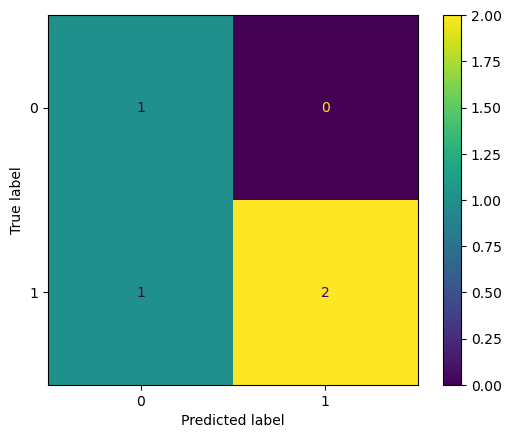

In [107]:
cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

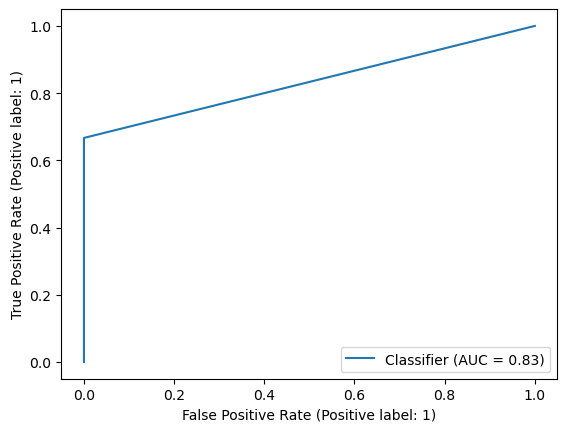

In [109]:
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()